In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import psutil
from IPython.core.display import display, HTML
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

Since I don't have the towing data yet, just looking at SEIZ data.

Look at if the SEIZ always follows the city protocol: https://www.cityofchicago.org/city/en/depts/fin/supp_info/revenue/boot_tow_information/booted_vehicle_information.html

In other words:
-is it always unpaid 2 tickets in final determination status for over a year that lead to a boot?

-is it always 3 unpaid tickets in final determination status that lead to a boot?

--are there a few officers who give boots outside of city protocol?

In [2]:
tickets = pd.read_csv('data/hacknight_ticket_sample_data_2015.csv', low_memory=False, parse_dates=['issue_date', 'ticket_queue_date'])

In [3]:
tickets_geo = pd.read_csv('data/hacknight_sample_data_geocode.csv', low_memory=False)


In [4]:
#this is creating a list of all the license plate numbers that have a boot warrant

tickets_SEIZ = tickets["license_plate_number"][tickets.notice_level == "SEIZ"]

#and all those that have a "FINAL" or sent to collections. want to sount these later

tickets_FINL = tickets["license_plate_number"][tickets.notice_level == "FINL"]

In [5]:
tickets.license_plate_number.value_counts()

603e09c12c607a2ecfdc8062d4120edd10b2f5499d76fb4cc5d7a8ec73f9e04d    1383
efa2070472920671da66b36d3d20dd2d43ff71d3abdc7b58c296cb352e46f5d2      17
6e10183be3982ddaa3551f36ce7b95286a4746a38c817b542f7e91501426d088      13
e2be47e37ed1fb0329320e5169cad12ec861b2b948aa4947d8ecefa46b74e1a8       9
f774c813bcffc5b490c4f24dcae1b6fd3577d0333264eb8a9509b8a688dd64f4       6
00a30ca6f11be2e3d10abb3a9d16953f05069ba431c296f53dd1ff416a6a333e       5
60be3f009de0952cad387710cd00a69a14fa1e00255e9af75f51f8bcac0804ac       5
4e9c8b41accba6fa01c0720864183b632f139986c326517bc86a81f8df1ec3e3       5
87bb3b8e3851e5f2cd5bb3a88b24db1927b2d61eea77adf8e754d895476ecfb8       5
2c2657dcba3e5a0fba25a4f59f0b711468b96fa4a05d3595b957f0c2c3706a2b       4
779d270e3e030a254cf79ecbd7ffd8c7782b0ffe86e8a530c093deabb878fdbc       4
1267b2cbcc3a97e54ef76a8ec31d79c6b9a5393240cec35a75bedc5bc32bf4c0       4
0c724655bf3e0a81c35620d82264e23d838643d4ca657ef3031e4ddda960d287       4
73883d3440f8a09f03c57eca113bc9e3765972994e4b0dc7a46

In [6]:
len(tickets_SEIZ)

9422

In [7]:
#in this data set we have 9422 instances of cars on the boot list

#this returns the number of SEIZ violations per license plate number

count_SEIZ = tickets_SEIZ.value_counts()
count_SEIZ

6e10183be3982ddaa3551f36ce7b95286a4746a38c817b542f7e91501426d088    13
e2be47e37ed1fb0329320e5169cad12ec861b2b948aa4947d8ecefa46b74e1a8     7
f774c813bcffc5b490c4f24dcae1b6fd3577d0333264eb8a9509b8a688dd64f4     6
c0045cce6f28fec3b93145c55f6e2f799e2bea2047de238e2e119c7482583ed7     4
dd02b975f2725080bf31c70823adc72b87dce1dc9385e26a7b5c0099eed22da2     4
5b3fa3b95e3ecb6d17ee383c25cde0d8ece34ca5d5dda333ab73a9c9954ba25b     4
00a3e745e962824c83a722025db7de50a63ed987d8d82fad48c84cb58f9388a8     3
8758ae8c490db15abb908ba6e5d2a4984c1162086d9f332b6eeb6c18aa28f3cf     3
6e6f9ea4e7ddf926986ff22a439f9521f049af7aeb2d5fc772de013e74e57d79     3
f9d9cd64bd0b618ecfbe44b7341299f7d21f84fa5efd59814007928ecfdd6ef4     3
05f6197561836a462f311d0893547f1aa8c60a2bcda38e6fd0542f61ecfd1db9     3
474d3d38f0bc6f92682298476a12314a7a507ffaa96efbe900e232fcae5ac368     3
1c45861cea852ad3928efbc9851dce7deb8d910693328d78db0d7cec1777e8b6     3
7abfa745926de02c06c1360dd53fac2f8642d87b954d711c7e7ea58bc3b370d5     3
4d5c1c

In [8]:
len(tickets_FINL)

4294

In [9]:
#ok, looks like we have 4294 instances of FINL designations. Weird because the SEIZ was 9000+ and it would seems that
#this by definition would mean that you don't need 2+ FINLs to get a SEIZ. 

#let's look at the counts for this one too.
count_FINL = tickets_FINL.value_counts()
count_FINL

3a19a06528a0e31218656775411227f1000a074b802410bec28f83b63bb7c2d8    2
8ba62e337d2976d54c2b94722c67f5128b89600ce20ab42c0ac138049d516a95    2
b078a78668b9eb1c63c1fab41cdc466a3d4ecbfc4fb149b7b6e884a681d38fd0    2
1a24db9a9c59f1d0ea36253bf2ca568f112fbac70a76d3f156058518260f86f7    2
77a5b08e5f8e60df5d28b6160c157c7454a274291a1879ca79dad6cadee09b6c    2
67555da4f1bee4cc8befd826f4a309305f9483f4aa2af29fdbf6b5e205a18881    2
c3a5ed7162f39c96213fd4b6f9023619eaa892dddd8b509815e429893671007e    2
b441a0f841b6a70fb84e8c9113a5c2722101c3ee5d27eabdb727083ddc1938d2    2
8d26d0e85f23e265f95631d16bd6283565041cfb2912791d7755ec8f01d075e9    2
a743689b05fe39400ff43da5ef91674b26f2ecdb48f57edddf0165d730460cb3    2
48d1789af555e0a729be0fb1d6c1062e090a4a70058488627620a05623256378    1
314eb990ebbc834072e702a3c75927af739485fa3351d18932e67abedb92ed50    1
5da1d0b0da672973d876cebf1dec81777f568669db68acbbf8bc7ae4f7bb81b0    1
ec2abc79b1c3121f10bb5be3b5b7fa7399761d36622f8bd23ed063db08d12a30    1
189f45604048c60b47e0

Ok this doesn't make sense. Maybe FINL isn't what I think it is. Most of these license plates have 2 or less "FINL" designations. Since the data guide says "“FINL” indicates the unpaid ticket was sent to collections" it may not be what we need. 

I'm thinking that DETR might be the right variable, as it's defined as "“DETR” indicates a hearing officer found the vehicle owner was found liable for the citation;"

So let's check that out.

In [10]:
tickets_DETR = tickets["license_plate_number"][tickets.notice_level == "DETR"]
len(tickets_DETR)

6245

In [11]:
#ok we got 6000+. Still less than SEIZ, but let's look at the counts

count_DETR = tickets_DETR.value_counts()
count_DETR

81ad651a87ed385ea959748e959d69da201b7e277684170550bb052c386822d6    3
efc1ac21e0ac29aa8a4389b5d36775a7571e780b700593c2a0ad4d6d676669ca    3
df28116f0da3c25a858b64f4d64fe78d46f65e8df6eb8d8c1bd278cd1093dfb2    3
9c7e395066a6c804c141d0d2484b56bedfc466b0d98604c2fbea166d29721695    2
40c0196ced5f32da7a59f9eac09f72d870543f6123820a1839ec9293b7b9bf97    2
edbd654155f3e2067cfd3423018ea10c82874999d9c579e4532caf81b6a6ce12    2
3271411212d41ce14c94d123b71b40c3dced2de3300106abcd973ed1db33e008    2
058e30f9ab257d9a482e8d475b50f36ebef951e91f900404f4451bafd7189928    2
580fe0d908a11824517c8dce06cb11907156c5a5640443513a3a6b9eae522c5d    2
56c0e5d066086c082c9cde2b56b6503765d0eeb89066cb93c79c1a5c48268f8e    2
fc6adbafc96505f50d663f8d93b3bd3302c46d26080f8dbfc4879c840e67420f    2
e7c74c9efc2ce4db85a7d0d047f4d364f43de6134311f14b6b310fbfde832506    2
0c3874a772c3e0185f8a0ffc670af3f02b73bce1aeaf01b55a72ab1556b18bdd    2
1f21d092d079f2297fa45dfe1d9fc8d0db7d75372a59df2a2fd5f14f246a2c67    2
17a7ad461a43371c6edb

In [12]:
#Hmm. still low per license plate number compared to SEIZ. Not sure what's going on.

#let's look at viol for good measure.

tickets_VIOL = tickets["license_plate_number"][tickets.notice_level == "VIOL"]
len(tickets_VIOL)


14471

In [13]:
count_VIOL = tickets_VIOL.value_counts()
count_VIOL 

0c724655bf3e0a81c35620d82264e23d838643d4ca657ef3031e4ddda960d287    4
a471dae05aa66ef0cce0881af710108f5ad73549efc282655cb519e5af655cdc    4
b6063a7725cb7815f896e514ec50e6c452d013aed6db03f971bfa5db700710e3    3
00a30ca6f11be2e3d10abb3a9d16953f05069ba431c296f53dd1ff416a6a333e    3
cf56609c9986c8a545326c887e9c31afe1dbb43c0751e1fdd15cf143fa1e4b8e    3
da533205a90f3195c89f67d0e3a29321fbe6a86d4e6f115cb1d7b0a33588b73c    3
808fe35231ae30a39c8d2de869aadf4ec004a254fcd398cf7a81978ceded7207    2
9ea5cbd8be6d203d8f5be2c7f8b804a6b8ed978a7df38b7945b3edffa17a5dbd    2
1f96f52fa1684e19988ea48d139fe6414f8ee33966660d51ff5eed139a1e9a44    2
1d856127c888305a5655feeb648f9bb988a51eada50e55690812dbb4f1c9bde2    2
6d60a3e9ac134237b8537d820424d90fb13dab1c37e90d0025fb080481b103d9    2
6c328e1a4a62f804d6d41975e5997b80dc3946c7614681d544c38a44f8fc02ec    2
78a41a907258c7433d26d065b93b5a6ee4cc92e659187c8878abe558f9e76a27    2
16386c4529c1210684f9c822668876e8cf92d7649d2de92dc274391d4e7311fb    2
987346839763fff0e249

In [14]:
#create data frame with just the SEIZ and DETR tickets

tickets_SD = tickets[(tickets.notice_level == "SEIZ") | (tickets.notice_level == "DETR")]
tickets_SD

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
1,65543631,2015-01-10 17:09:00,423 N LARAMIE,13d93046fb2c3bc2d79baa8647d620d0c5a65fdc223cb9...,IL,PAS,606394357,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,15,CPD,CHRY,60,120,146.4,0.0,Notice,2015-01-28,SEIZ,NaN,5109291290,16391,"400 n laramie, chicago, il"
3,64465302,2015-01-14 08:09:00,229 W CERMAK RD,2800f6eaba1dc6fde0b0785df17c808dba871d1570cc4c...,IL,PAS,605442187,0964130A,PARK ALLEY,495,Miscellaneous,HOND,150,300,0.0,150.0,Paid,2015-04-28,DETR,NaN,5191229940,313,"200 w cermak rd, chicago, il"
4,9189537354,2015-10-28 16:26:00,2410 N MONTICELLO AV,f0858c838c8cabda4e8fd3e0425a6c330a76e006f9de01...,IL,PAS,60625,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,729,Miscellaneous,TOYT,50,100,0.0,100.0,Paid,2016-01-27,SEIZ,NaN,5168404170,1407,"2400 n monticello av, chicago, il"
8,66116401,2015-08-15 22:46:00,3100 W FILLMORE,1a6f9bfd652493a4bb6d0beeb5fa3e7872a38983c57aa3...,IL,PAS,606232113,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",11,CPD,BUIC,200,400,488.0,0.0,Notice,2016-10-03,SEIZ,NaN,5193679090,19533,"3100 w fillmore, chicago, il"
9,66291855,2015-11-24 23:24:00,6537 S CALUMET,8c4c93c8038966384c51d4e68416f3cb69a8e4631524ee...,WI,PAS,535113434,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,OLDS,60,120,146.4,0.0,Notice,2015-12-17,SEIZ,NaN,5185329810,15766,"6500 s calumet, chicago, il"
11,9189042599,2015-07-23 20:26:00,5306 S LAKE PARK SERVICE,72484e33b77f0eca024a48f494061668563a91da52d0a7...,IN,PAS,463077003,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,BUIC,50,100,0.0,50.0,Paid,2015-10-23,DETR,NaN,5183274390,1546,"5300 s lake park service, chicago, il"
15,9188878506,2015-05-20 09:25:00,3801 N FREMONT,568f64f8c645a354725e3b86eaf6cd4ecad7d36dbab21f...,IL,PAS,60640,0964040B,STREET CLEANING,498,DOF,HOND,60,120,146.4,0.0,Notice,2015-05-28,SEIZ,NaN,5061140550,714,"3800 n fremont, chicago, il"
28,9189570641,2015-10-31 15:10:00,2540 W DIVISION,c0df89e15d857feea5118e1330da4f8146ef79beb300e8...,IA,PAS,510220105,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,729,Miscellaneous,HOND,50,100,0.0,122.0,Paid,2016-07-07,SEIZ,NaN,5193296260,1407,"2500 w division, chicago, il"
31,65524714,2015-01-16 23:56:00,116 W KINZIE,d0e16a7fcdf170c28ae703ce261e2159bd9ea63050d5c0...,IL,PAS,601431666,0964080B,NO STANDING/PARKING TIME RESTRICTED,18,CPD,FORD,100,200,0.0,100.0,Paid,2015-04-30,DETR,Liable,5189518830,17944,"100 w kinzie, chicago, il"
33,9189679052,2015-11-23 21:44:00,352 E WALTON ST,b87c8a670d19263d52007ef65e4dfba0d4cdbd37e5bf20...,IL,PAS,606412248,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,729,Miscellaneous,PONT,65,130,158.6,0.0,Notice,2015-12-02,SEIZ,NaN,5185149370,1424,"300 e walton st, chicago, il"


In [15]:
tickets1 = tickets_SD[['license_plate_number','violation_description','notice_level']].groupby(['violation_description','notice_level']).nunique()
tickets1

license_plate_number  \
violation_description                    notice_level                         
2 REAR TRAILER LAMPS REQ'D VISIBLE 500'  SEIZ                             1   
20'OF CROSSWALK                          DETR                             7   
                                         SEIZ                            16   
3-7 AM SNOW ROUTE                        DETR                            25   
                                         SEIZ                            16   
ABANDONED VEH. FOR 7 DAYS OR INOPERABLE  DETR                            20   
                                         SEIZ                            53   
BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE     DETR                            38   
                                         SEIZ                            50   
BLOCK ALLEY                              DETR                             1   
                                         SEIZ                             4   
BURGLAR ALARM SOUNDING OVER 4 MINUTES    DETR                             2   
CURB LOADING ZONE                        DETR                            18   
                                         SEIZ                            11   
DEPR./DIMMED LAMPS                       SEIZ                             1   
DISABLED CURB CUT                        DETR                            13   
                                         SEIZ                            15   
DISABLED PARKING ZONE                    DETR                            43   
                                         SEIZ                            77   
DOUBLE PARKING OR STANDING               DETR                            77   
                                         SEIZ                           100   
EXCESS FUMES/SMOKE DURING OPERATION      SEIZ                             2   
EXP. METER NON-CENTRAL BUSINESS DISTRICT DETR                           721   
                                         SEIZ                           640   
EXPIRED METER CENTRAL BUSINESS DISTRICT  DETR                           307   
                                         SEIZ                           299   
EXPIRED PLATES OR TEMPORARY REGISTRATION DETR                          1088   
                                         SEIZ                          2085   
FAIL TO DISPLAY TV NEWS PERMIT           DETR                             1   
                                         SEIZ                             1   
...                                                                     ...   
SAFETY BELTS REQUIRED ON SCHOOL BUS      DETR                             2   
                                         SEIZ                             6   
SNOW ROUTE: 2'' OF SNOW OR MORE          DETR                            10   
                                         SEIZ                             8   
SPECIAL EVENTS RESTRICTION               DETR                            20   
                                         SEIZ                            15   
STAND, PARK, OR OTHER USE OF BUS LANE    DETR                            48   
                                         SEIZ                            65   
STOP SIGN OR TRAFFIC SIGNAL              DETR                            84   
                                         SEIZ                            72   
STREET CLEANING                          DETR                           836   
                                         SEIZ                           758   
SUSPENSION MODIFIED BEYOND 3             SEIZ                             1   
TRUCK OR SEMI-TRAILER PROHIBITED         DETR                             4   
TRUCK,MOTOR HOME, BUS BUSINESS STREET    DETR                             7   
                                         SEIZ                             5   
TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET DETR                            48   
                                         SEIZ                            51   
TWO HEAD LAMPS REQUIRED VI

In [16]:
tickets_sorted = tickets1.sort_values(['license_plate_number'], ascending=False)
tickets_sorted

license_plate_number  \
violation_description                              notice_level                         
EXPIRED PLATES OR TEMPORARY REGISTRATION           SEIZ                          2085   
NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 LBS. SEIZ                          1860   
EXPIRED PLATES OR TEMPORARY REGISTRATION           DETR                          1088   
STREET CLEANING                                    DETR                           836   
                                                   SEIZ                           758   
EXP. METER NON-CENTRAL BUSINESS DISTRICT           DETR                           721   
                                                   SEIZ                           640   
RESIDENTIAL PERMIT PARKING                         SEIZ                           573   
NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 LBS. DETR                           494   
RESIDENTIAL PERMIT PARKING                         DETR                           493   
PARKING/STANDING PROHIBITED ANYTIME                SEIZ                           488   
REAR AND FRONT PLATE REQUIRED                      SEIZ                           469   
PARKING/STANDING PROHIBITED ANYTIME                DETR                           463   
EXPIRED METER CENTRAL BUSINESS DISTRICT            DETR                           307   
                                                   SEIZ                           299   
NO STANDING/PARKING TIME RESTRICTED                DETR                           264   
RUSH HOUR PARKING                                  SEIZ                           247   
NO STANDING/PARKING TIME RESTRICTED                SEIZ                           235   
REAR AND FRONT PLATE REQUIRED                      DETR                           235   
RUSH HOUR PARKING                                  DETR                           229   
WITHIN 15' OF FIRE HYDRANT                         SEIZ                           190   
PARK OR STAND IN BUS/TAXI/CARRIAGE STAND           SEIZ                           183   
WITHIN 15' OF FIRE HYDRANT                         DETR                           138   
PARK OR STAND IN BUS/TAXI/CARRIAGE STAND           DETR                           128   
PARK ALLEY                                         SEIZ                           101   
DOUBLE PARKING OR STANDING                         SEIZ                           100   
STOP SIGN OR TRAFFIC SIGNAL                        DETR                            84   
DOUBLE PARKING OR STANDING                         DETR                            77   
DISABLED PARKING ZONE                              SEIZ                            77   
NONCOMPLIANT PLATE(S)                              SEIZ                            76   
...                                                                               ...   
IMPROPER LAMPS NON-MOTOR VEHICLE                   SEIZ                             2   
VEH 6' OR HIGHER WITHIN 20' OF CROSSWALK           DETR                             2   
BURGLAR ALARM SOUNDING OVER 4 MINUTES              DETR                             2   
EXCESS FUMES/SMOKE DURING OPERATION                SEIZ                             2   
NO PARK IN PUBLIC LOT                              DETR                             2   
SAFETY BELTS REQUIRED ON SCHOOL BUS                DETR                             2   
REAR PLATE LIT AND LEGIBLE FOR 50'                 DETR                             2   
PARKED/STANDING UNATTENDED W/MOTOR RUNNI           DETR                             2   
INDUSTRIAL PERMIT PARKING                          DETR                             1   
MORE THAN THREE OR IMPROPER AUX LAMP               DETR                             1   
PARK MOTORCYCLE/SCOOTER PARK AT 90 DEGREE ANGLE    DETR                             1   
NO OR IMPROPER MUFFLER                             SEIZ                             1   
VEH 6' OR HIGHER WITHIN 20' OF CROSSWALK           SEIZ     

In [17]:
tickets_sorted.unstack()

license_plate_number  \
notice_level                                                       DETR   
violation_description                                                     
2 REAR TRAILER LAMPS REQ'D VISIBLE 500'                             NaN   
20'OF CROSSWALK                                                     7.0   
3-7 AM SNOW ROUTE                                                  25.0   
ABANDONED VEH. FOR 7 DAYS OR INOPERABLE                            20.0   
BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE                               38.0   
BLOCK ALLEY                                                         1.0   
BURGLAR ALARM SOUNDING OVER 4 MINUTES                               2.0   
CURB LOADING ZONE                                                  18.0   
DEPR./DIMMED LAMPS                                                  NaN   
DISABLED CURB CUT                                                  13.0   
DISABLED PARKING ZONE                                              43.0   
DOUBLE PARKING OR STANDING                                         77.0   
EXCESS FUMES/SMOKE DURING OPERATION                                 NaN   
EXP. METER NON-CENTRAL BUSINESS DISTRICT                          721.0   
EXPIRED METER CENTRAL BUSINESS DISTRICT                           307.0   
EXPIRED PLATES OR TEMPORARY REGISTRATION                         1088.0   
FAIL TO DISPLAY TV NEWS PERMIT                                      1.0   
FRONT PLATE REQUIRED FOR TRUCK TRACTORS                             1.0   
HAZARDOUS DILAPIDATED VEHICLE                                       5.0   
HORN REQUIRED DURING OPERATION                                      NaN   
IMPROPER DISPLAY OF CITY STICKER                                    7.0   
IMPROPER LAMPS NON-MOTOR VEHICLE                                    NaN   
INDUSTRIAL PERMIT PARKING                                           1.0   
LAMPS BROKEN OR INOPERABLE                                          4.0   
MORE THAN THREE OR IMPROPER AUX LAMP                                1.0   
MOTORCYCLE BRAKES REQ'D DURING OPERATION                            NaN   
NO CITY STICKER VEHICLE OVER 16,000 LBS.                            2.0   
NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 LBS.                494.0   
NO OR IMPROPER MUFFLER                                              NaN   
NO PARK IN PRIVATE LOT                                              8.0   
...                                                                 ...   
PARK VEHICLE SOLE PURPOSE OF DISPLAYING FOR SALE                    3.0   
PARK/STAND ON BICYCLE PATH                                          4.0   
PARKED/STANDING UNATTENDED W/MOTOR RUNNI                            2.0   
PARKING/STANDING PROHIBITED ANYTIME                               463.0   
PROPER FRONT AND REAR BUMPERS REQUIRED                              NaN   
REAR AND FRONT PLATE REQUIRED                                     235.0   
REAR PLATE LIT AND LEGIBLE FOR 50'                                  2.0   
REAR PLATE REQUIRED MOTORCYCLE/TRAILER                              NaN   
REAR VIEW MIRROR REQUIRED                                           NaN   
RED REAR LAMP REQUIRED VISIBLE 500'                                 5.0   
RESIDENTIAL PERMIT PARKING                                        493.0   
RUSH HOUR PARKING                                                 229.0   
SAFETY BELTS REQUIRED                                              11.0   
SAFETY BELTS REQUIRED ON SCHOOL BUS                                 2.0   
SNOW ROUTE: 2'' OF SNOW OR MORE                                    10.0   
SPECIAL EVENTS RESTRICTION                                         20.0   
STAND, PARK, OR OTHER USE OF BUS LANE                              48.0   
STOP SIGN OR TRAFFIC SIGNAL                                        84.0   
STREET CLEANING                                                   836.0   
SUSPENSION MODIFIED BEYOND 3                                        NaN   
T

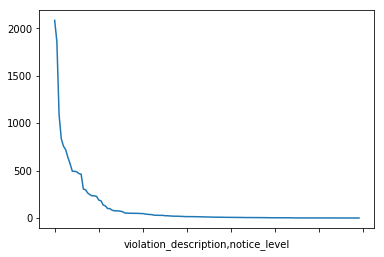

In [18]:
tickets_sorted.license_plate_number.plot()

In [19]:
scofflaw=tickets[tickets.license_plate_number=='603e09c12c607a2ecfdc8062d4120edd10b2f5499d76fb4cc5d7a8ec73f9e04d']

In [20]:
len(scofflaw)

1383

In [21]:
scofflaw

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
7,9189684298,2015-11-19 20:26:00,4701 N WINTHROP,603e09c12c607a2ecfdc8062d4120edd10b2f5499d76fb...,IL,NaN,NaN,0976160A,REAR AND FRONT PLATE REQUIRED,502,DOF,DODG,60,120,60.0,0.0,Define,2015-11-23,NaN,NaN,0,1357,"4700 n winthrop, chicago, il"
44,9189692238,2015-11-25 08:44:00,7712 S PHILLIPS AVE,603e09c12c607a2ecfdc8062d4120edd10b2f5499d76fb...,IL,NaN,NaN,0976160A,REAR AND FRONT PLATE REQUIRED,498,DOF,FORD,60,120,60.0,0.0,Define,2015-11-27,NaN,NaN,0,92,"7700 s phillips ave, chicago, il"
174,9188668518,2015-04-10 08:50:00,7311 S KEDZIE AVE,603e09c12c607a2ecfdc8062d4120edd10b2f5499d76fb...,IL,NaN,NaN,0976160A,REAR AND FRONT PLATE REQUIRED,498,DOF,FORD,60,120,60.0,0.0,Define,2015-04-13,NaN,NaN,0,740,"7300 s kedzie ave, chicago, il"
191,65874475,2015-05-27 19:20:00,5111 S KEDZIE,603e09c12c607a2ecfdc8062d4120edd10b2f5499d76fb...,IL,PAS,NaN,0980080A,PARK VEHICLE SOLE PURPOSE OF DISPLAYING FOR SALE,9,CPD,NISS,100,200,100.0,0.0,Define,2015-06-02,NaN,NaN,0,3536,"5100 s kedzie, chicago, il"
292,9189645786,2015-11-19 08:12:00,6041 S KILDARE,603e09c12c607a2ecfdc8062d4120edd10b2f5499d76fb...,IL,NaN,NaN,0976160A,REAR AND FRONT PLATE REQUIRED,498,DOF,GMC,60,120,60.0,0.0,Define,2015-11-20,NaN,NaN,0,740,"6000 s kildare, chicago, il"
334,64989095,2015-07-07 15:26:00,2902 W LAWRENCE,603e09c12c607a2ecfdc8062d4120edd10b2f5499d76fb...,IL,PAS,NaN,0976160A,REAR AND FRONT PLATE REQUIRED,17,CPD,CHRY,60,120,60.0,0.0,Define,2015-07-16,NaN,NaN,0,5404,"2900 w lawrence, chicago, il"
346,65226924,2015-02-09 19:20:00,6611 S ELLIS,603e09c12c607a2ecfdc8062d4120edd10b2f5499d76fb...,IL,PAS,NaN,0976160A,REAR AND FRONT PLATE REQUIRED,16,CPD,BUIC,60,120,60.0,0.0,Define,2015-02-20,NaN,NaN,0,8565,"6600 s ellis, chicago, il"
388,65726259,2015-04-21 16:32:00,5139 S KEDZIE,603e09c12c607a2ecfdc8062d4120edd10b2f5499d76fb...,IL,PAS,NaN,0980080A,PARK VEHICLE SOLE PURPOSE OF DISPLAYING FOR SALE,9,CPD,FORD,100,200,100.0,0.0,Define,2015-04-27,NaN,NaN,0,3536,"5100 s kedzie, chicago, il"
390,9189511161,2015-10-20 12:21:00,911 W 82ND ST,603e09c12c607a2ecfdc8062d4120edd10b2f5499d76fb...,IL,NaN,NaN,0976160A,REAR AND FRONT PLATE REQUIRED,498,DOF,CADI,60,120,60.0,0.0,Define,2015-10-21,NaN,NaN,0,275,"900 w 82nd st, chicago, il"
425,9188473374,2015-01-22 14:23:00,3109 W 40TH PL,603e09c12c607a2ecfdc8062d4120edd10b2f5499d76fb...,IL,NaN,NaN,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",498,DOF,BMW,75,150,75.0,0.0,Define,2015-01-23,NaN,NaN,0,712,"3100 w 40th pl, chicago, il"


In [22]:
tickets_SEIZ_only = tickets[tickets.notice_level == "SEIZ"]
tickets_SEIZ_only

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
1,65543631,2015-01-10 17:09:00,423 N LARAMIE,13d93046fb2c3bc2d79baa8647d620d0c5a65fdc223cb9...,IL,PAS,606394357,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,15,CPD,CHRY,60,120,146.40,0.00,Notice,2015-01-28,SEIZ,NaN,5109291290,16391,"400 n laramie, chicago, il"
4,9189537354,2015-10-28 16:26:00,2410 N MONTICELLO AV,f0858c838c8cabda4e8fd3e0425a6c330a76e006f9de01...,IL,PAS,60625,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,729,Miscellaneous,TOYT,50,100,0.00,100.00,Paid,2016-01-27,SEIZ,NaN,5168404170,1407,"2400 n monticello av, chicago, il"
8,66116401,2015-08-15 22:46:00,3100 W FILLMORE,1a6f9bfd652493a4bb6d0beeb5fa3e7872a38983c57aa3...,IL,PAS,606232113,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",11,CPD,BUIC,200,400,488.00,0.00,Notice,2016-10-03,SEIZ,NaN,5193679090,19533,"3100 w fillmore, chicago, il"
9,66291855,2015-11-24 23:24:00,6537 S CALUMET,8c4c93c8038966384c51d4e68416f3cb69a8e4631524ee...,WI,PAS,535113434,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,OLDS,60,120,146.40,0.00,Notice,2015-12-17,SEIZ,NaN,5185329810,15766,"6500 s calumet, chicago, il"
15,9188878506,2015-05-20 09:25:00,3801 N FREMONT,568f64f8c645a354725e3b86eaf6cd4ecad7d36dbab21f...,IL,PAS,60640,0964040B,STREET CLEANING,498,DOF,HOND,60,120,146.40,0.00,Notice,2015-05-28,SEIZ,NaN,5061140550,714,"3800 n fremont, chicago, il"
28,9189570641,2015-10-31 15:10:00,2540 W DIVISION,c0df89e15d857feea5118e1330da4f8146ef79beb300e8...,IA,PAS,510220105,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,729,Miscellaneous,HOND,50,100,0.00,122.00,Paid,2016-07-07,SEIZ,NaN,5193296260,1407,"2500 w division, chicago, il"
33,9189679052,2015-11-23 21:44:00,352 E WALTON ST,b87c8a670d19263d52007ef65e4dfba0d4cdbd37e5bf20...,IL,PAS,606412248,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,729,Miscellaneous,PONT,65,130,158.60,0.00,Notice,2015-12-02,SEIZ,NaN,5185149370,1424,"300 e walton st, chicago, il"
34,9188767045,2015-04-29 14:39:00,3025 N HALSTED ST,05ba77dfb1aeb005840e2b0095da1b570070ea0236f812...,IL,PAS,606577211,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,FORD,50,100,0.00,122.00,Paid,2017-10-31,SEIZ,NaN,5183649580,794,"3000 n halsted st, chicago, il"
43,65583845,2015-04-01 00:26:00,3610 W DOUGLAS BLVD,b068684ccd557884cefc77c708e38fb8d5f9c0a5282126...,IL,TMP,60623,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,10,CPD,PONT,60,120,146.40,0.00,Notice,2015-04-08,SEIZ,NaN,5185726240,9006,"3600 w douglas blvd, chicago, il"
59,65825848,2015-04-12 16:07:00,2100 S PULASKI,b1801232ba092a8ce35039b4f8f7c1bc13b01c16cd4777...,IL,PAS,606513145,0964100D,DISABLED CURB CUT,10,CPD,CHEV,75,150,183.00,0.00,Notice,2015-04-22,SEIZ,NaN,5075039420,8820,"2100 s pulaski, chicago, il"


In [23]:
len(tickets_SEIZ_only)

9422

/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


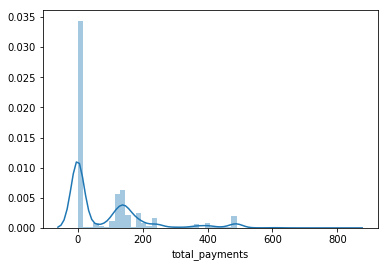

In [24]:
sns.distplot(tickets_SEIZ_only['total_payments'])